In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data

ls = pd.read_csv("Leads.csv")
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
ls.shape

(9240, 37)

In [4]:
ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Cleaning the Dataframe

In [6]:
# Replacing 'Select' with NaN (Since it means no option is selected)
ls = ls.replace('select',np.nan)

In [7]:
ls[['Prospect ID','Do Not Email','Do Not Call','Last Activity','What matters most to you in choosing a course','Tags','Update me on Supply Chain Content','Get updates on DM Content','City','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']].head()

,Prospect ID,Do Not Email,Do Not Call,Last Activity,What matters most to you in choosing a course,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,No,No,Page Visited on Website,Better Career Prospects,Interested in other courses,No,No,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,No,No,Email Opened,Better Career Prospects,Ringing,No,No,Select,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,No,No,Email Opened,Better Career Prospects,Will revert after reading the email,No,No,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,No,No,Unreachable,Better Career Prospects,Ringing,No,No,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,No,No,Converted to Lead,Better Career Prospects,Will revert after reading the email,No,No,Mumbai,02.Medium,01.High,No,No,Modified


In [8]:
ls.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
ls2 = ls.drop(['Prospect ID','Do Not Email','Do Not Call','Last Activity','What matters most to you in choosing a course','Tags','Update me on Supply Chain Content','Get updates on DM Content','City','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)
ls2.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Lead Profile,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,API,Olark Chat,0,0.0,0,0.0,NaN,Select,Select,...,No,No,No,No,No,No,Low in Relevance,Select,15.0,15.0
1,660728,API,Organic Search,0,5.0,674,2.5,India,Select,Select,...,No,No,No,No,No,No,NaN,Select,15.0,15.0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Select,...,No,No,No,No,No,No,Might be,Potential Lead,14.0,20.0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,...,No,No,No,No,No,No,Not Sure,Select,13.0,17.0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Select,Other,...,No,No,No,No,No,No,Might be,Select,15.0,18.0


In [10]:
# Checking the percentage of missing value

round(100*(ls2.isnull().sum()/len(ls2)),2).sort_values()

Lead Number                                0.00
Receive More Updates About Our Courses     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
X Education Forums                         0.00
Newspaper Article                          0.00
Magazine                                   0.00
Search                                     0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Lead Origin                                0.00
Lead Source                                0.39
Page Views Per Visit                       1.48
TotalVisits                                1.48
Specialization                            15.56
How did you hear about X Education        23.89
Country                                   26.63
What is your current occupation           29.11
Lead Profile                              29.32
Asymmetrique Activity Score             

In [11]:
# Removing all columns with >40% null values

ls3 = ls2.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'], axis=1)
ls3.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Profile
0,660737,API,Olark Chat,0,0.0,0,0.0,NaN,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Select
1,660728,API,Organic Search,0,5.0,674,2.5,India,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Select
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Select,Student,No,No,No,No,No,No,No,No,Potential Lead
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,Select
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Select,Other,Unemployed,No,No,No,No,No,No,No,No,Select


In [12]:
round(100*(ls3.isnull().sum()/len(ls2)),2).sort_values()

Lead Number                                0.00
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Digital Advertisement                      0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Lead Source                                0.39
TotalVisits                                1.48
Page Views Per Visit                       1.48
Specialization                            15.56
How did you hear about X Education        23.89
Country                                   26.63
What is your current occupation           29.11
Lead Profile                              29.32
dtype: float64

In [13]:
# Updating the null value with the mode value
ls3['Specialization'] = ls3['Specialization'].fillna('NA')
ls3['How did you hear about X Education'] = ls3['How did you hear about X Education'].fillna('NA')
ls3['Country'] = ls3['Country'].fillna('NA')
ls3['What is your current occupation'] = ls3['What is your current occupation'].fillna('NA')
ls3['Lead Profile'] = ls3['Lead Profile'].fillna('NA')

In [14]:
round(100*(ls3.isnull().sum()/len(ls2)),2).sort_values()

Lead Number                               0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Newspaper Article                         0.00
Magazine                                  0.00
Search                                    0.00
What is your current occupation           0.00
How did you hear about X Education        0.00
Specialization                            0.00
Country                                   0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Lead Origin                               0.00
Receive More Updates About Our Courses    0.00
Lead Profile                              0.00
Lead Source                               0.39
Page Views Per Visit                      1.48
TotalVisits                               1.48
dtype: float64

In [15]:
ls3.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Profile
0,660737,API,Olark Chat,0,0.0,0,0.0,NA,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Select
1,660728,API,Organic Search,0,5.0,674,2.5,India,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Select
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Select,Student,No,No,No,No,No,No,No,No,Potential Lead
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,Select
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Select,Other,Unemployed,No,No,No,No,No,No,No,No,Select


In [16]:
ls3.rename(columns={'Total Time Spent on Website': 'Time_Website', 'How did you hear about X Education': 'Info_on_XEducation','What is your current occupation':'Current_Occupation'}, inplace=True)
ls3.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Time_Website', 'Page Views Per Visit', 'Country', 'Specialization',
       'Info_on_XEducation', 'Current_Occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Lead Profile'],
      dtype='object')

In [17]:
ls3 = ls3.drop(['Receive More Updates About Our Courses'], axis=1)
ls3.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time_Website,Page Views Per Visit,Country,Specialization,Info_on_XEducation,Current_Occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile
0,660737,API,Olark Chat,0,0.0,0,0.0,NA,Select,Select,Unemployed,No,No,No,No,No,No,No,Select
1,660728,API,Organic Search,0,5.0,674,2.5,India,Select,Select,Unemployed,No,No,No,No,No,No,No,Select
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Select,Student,No,No,No,No,No,No,No,Potential Lead
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,Select
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Select,Other,Unemployed,No,No,No,No,No,No,No,Select


## EDA

In [18]:
ls3.Country.value_counts()

India                   6492
NA                      2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [19]:
def country_check(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "NA":
        category = "NA"
    else:
        category = "outside india"
    return category

ls3['Country'] = ls3.apply(lambda x:country_check(x['Country']), axis = 1)
ls3['Country'].value_counts()

India            6492
NA               2461
outside india     287
Name: Country, dtype: int64

In [20]:
ls3.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time_Website,Page Views Per Visit,Country,Specialization,Info_on_XEducation,Current_Occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile
0,660737,API,Olark Chat,0,0.0,0,0.0,NA,Select,Select,Unemployed,No,No,No,No,No,No,No,Select
1,660728,API,Organic Search,0,5.0,674,2.5,India,Select,Select,Unemployed,No,No,No,No,No,No,No,Select
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Select,Student,No,No,No,No,No,No,No,Potential Lead
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,Select
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Select,Other,Unemployed,No,No,No,No,No,No,No,Select


In [21]:
ls3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lead Number              9240 non-null   int64  
 1   Lead Origin              9240 non-null   object 
 2   Lead Source              9204 non-null   object 
 3   Converted                9240 non-null   int64  
 4   TotalVisits              9103 non-null   float64
 5   Time_Website             9240 non-null   int64  
 6   Page Views Per Visit     9103 non-null   float64
 7   Country                  9240 non-null   object 
 8   Specialization           9240 non-null   object 
 9   Info_on_XEducation       9240 non-null   object 
 10  Current_Occupation       9240 non-null   object 
 11  Search                   9240 non-null   object 
 12  Magazine                 9240 non-null   object 
 13  Newspaper Article        9240 non-null   object 
 14  X Education Forums      

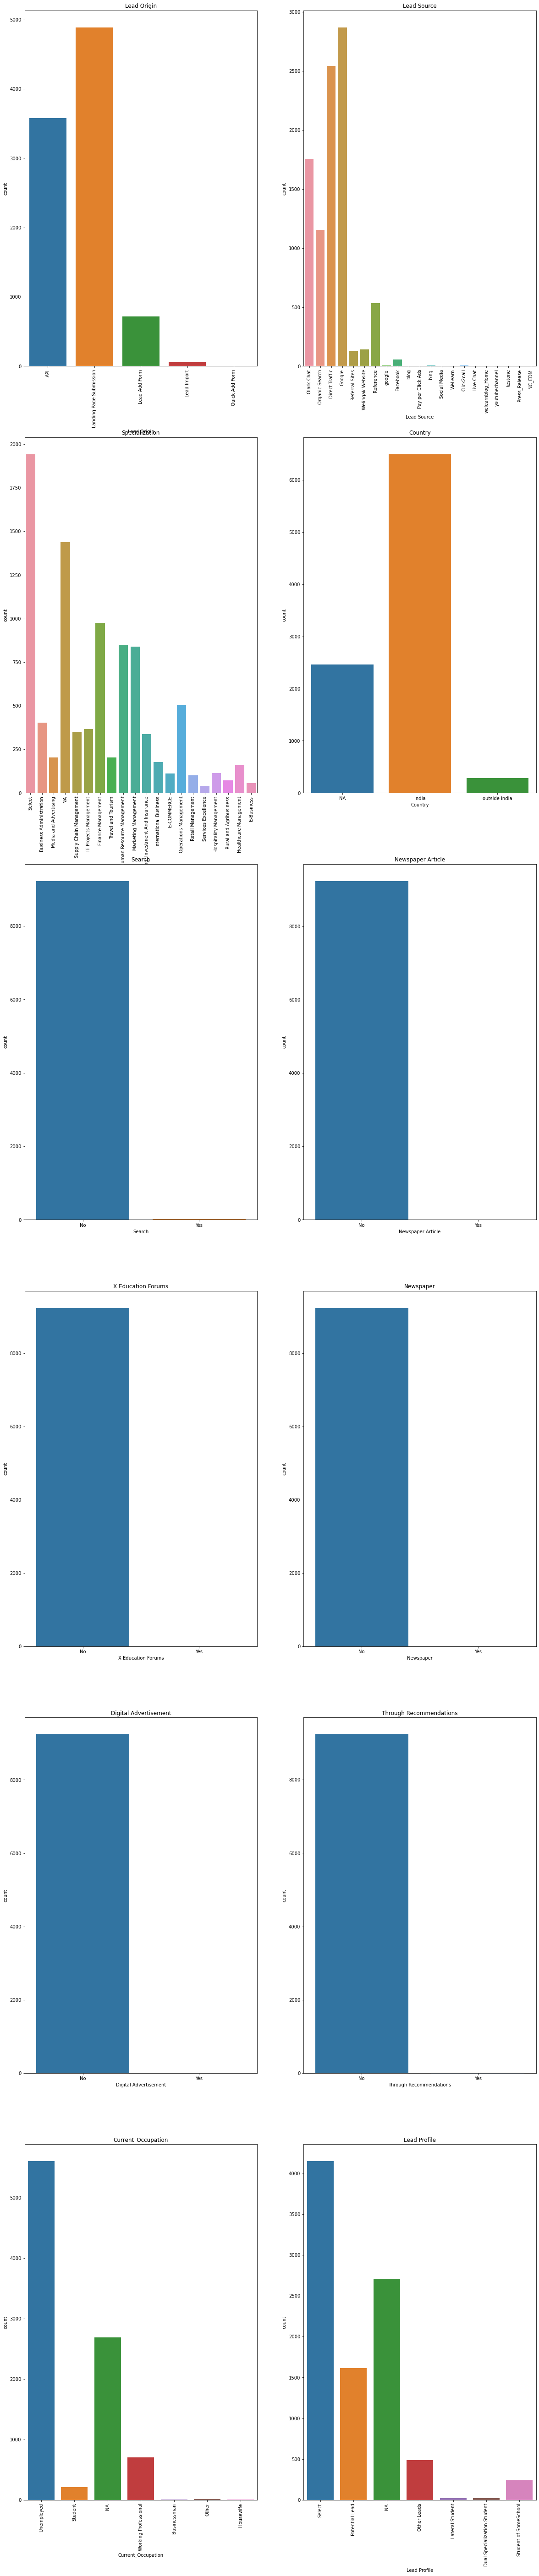

In [22]:
plt.figure(figsize = (20,100))

plt.subplot(6,2,1)
sns.countplot(ls3['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(ls3['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(6,2,3)
sns.countplot(ls3['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(6,2,4)
sns.countplot(ls3['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(ls3['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(ls3['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(ls3['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(ls3['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(ls3['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(ls3['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(ls3['Current_Occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current_Occupation')

plt.subplot(6,2,12)
sns.countplot(ls3['Lead Profile']).tick_params(axis='x', rotation = 90)
plt.title('Lead Profile')
#sns.countplot(ls3['Last Notable Activity']).tick_params(axis='x', rotation = 90)
#plt.title('Last Notable Activity')


plt.show()

In [23]:
ls3.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Time_Website', 'Page Views Per Visit', 'Country', 'Specialization',
       'Info_on_XEducation', 'Current_Occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile'],
      dtype='object')

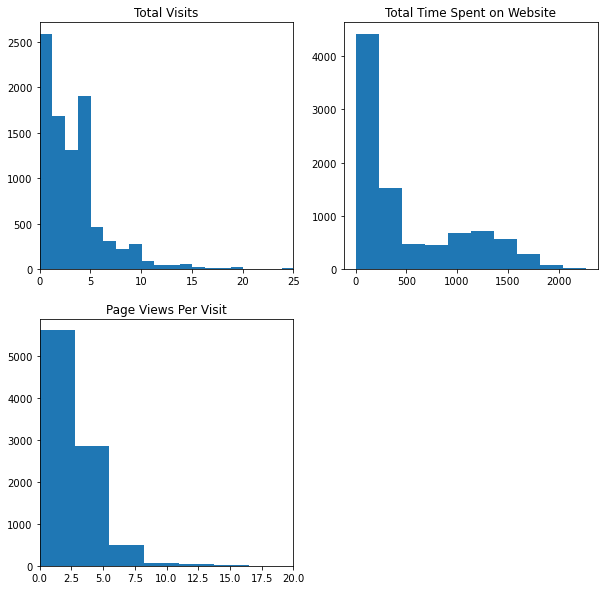

In [24]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(ls3['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(ls3['Time_Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(ls3['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

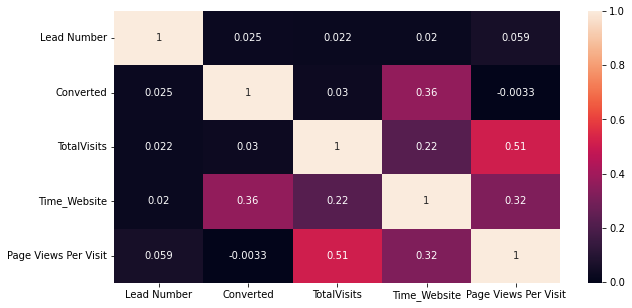

In [25]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(ls3.corr(), annot=True)
plt.show()

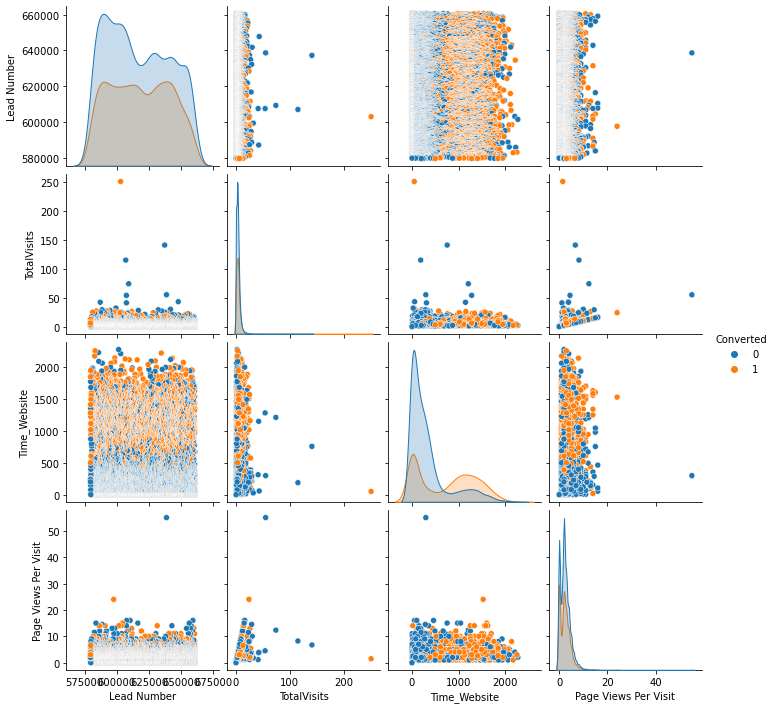

In [26]:
sns.pairplot(ls3,diag_kind='kde',hue='Converted')
plt.show()

### Converting Binary variables (Yes/No) to 0/1

In [27]:
ls3.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time_Website,Page Views Per Visit,Country,Specialization,Info_on_XEducation,Current_Occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile
0,660737,API,Olark Chat,0,0.0,0,0.0,NA,Select,Select,Unemployed,No,No,No,No,No,No,No,Select
1,660728,API,Organic Search,0,5.0,674,2.5,India,Select,Select,Unemployed,No,No,No,No,No,No,No,Select
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Select,Student,No,No,No,No,No,No,No,Potential Lead
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,Select
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Select,Other,Unemployed,No,No,No,No,No,No,No,Select


In [28]:
# List of variables to map

varlist =  ['Search', 'Magazine', 'Newspaper Article','Newspaper','X Education Forums', 'Digital Advertisement','Through Recommendations']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
ls3[varlist] = ls3[varlist].apply(binary_map)

In [29]:
ls3.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time_Website,Page Views Per Visit,Country,Specialization,Info_on_XEducation,Current_Occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile
0,660737,API,Olark Chat,0,0.0,0,0.0,NA,Select,Select,Unemployed,0,0,0,0,0,0,0,Select
1,660728,API,Organic Search,0,5.0,674,2.5,India,Select,Select,Unemployed,0,0,0,0,0,0,0,Select
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Select,Student,0,0,0,0,0,0,0,Potential Lead
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,0,0,0,0,0,0,0,Select
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Select,Other,Unemployed,0,0,0,0,0,0,0,Select


### For categorical varaiables with multiple values creating dummy features

In [30]:
ls3.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Time_Website', 'Page Views Per Visit', 'Country', 'Specialization',
       'Info_on_XEducation', 'Current_Occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile'],
      dtype='object')

In [31]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(ls3[['Lead Origin', 'Lead Source', 'Specialization', 'Info_on_XEducation', 'Current_Occupation', 'Lead Profile']], drop_first=True)

# Adding the results to the master dataframe
ls4 = pd.concat([ls3, dummy1], axis=1)

In [32]:
ls4.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time_Website,Page Views Per Visit,Country,Specialization,Info_on_XEducation,...,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_NA,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
0,660737,API,Olark Chat,0,0.0,0,0.0,NA,Select,Select,...,0,0,1,0,0,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,674,2.5,India,Select,Select,...,0,0,1,0,0,0,0,0,1,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Select,...,0,1,0,0,0,0,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,...,0,0,1,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Select,Other,...,0,0,1,0,0,0,0,0,1,0


Dropping the repeated variables

In [33]:
# We have created dummies for the below variables, so we can drop them
ls4 = ls4.drop(['Lead Origin', 'Lead Source', 'Specialization', 'Info_on_XEducation', 'Current_Occupation', 'Lead Profile'], 1)
ls4.head()

,Lead Number,Converted,TotalVisits,Time_Website,Page Views Per Visit,Country,Search,Magazine,Newspaper Article,X Education Forums,...,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_NA,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
0,660737,0,0.0,0,0.0,NA,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,India,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,India,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,660719,0,1.0,305,1.0,India,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,660681,1,2.0,1428,1.0,India,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [34]:
ls4 = ls4.drop(['Country'], axis=1)
ls4.head()

,Lead Number,Converted,TotalVisits,Time_Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_NA,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,660719,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,660681,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [35]:
ls4.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Time_Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_NA,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,0.000108,...,0.001732,0.022727,0.606061,0.076407,0.002597,0.293182,0.052706,0.174567,0.448701,0.026082
std,23405.995698,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,0.010403,0.010403,...,0.041579,0.149041,0.488648,0.265662,0.050901,0.455246,0.223457,0.379617,0.497388,0.159389
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
ls4.isna().sum()

Lead Number                             0
Converted                               0
TotalVisits                           137
Time_Website                            0
Page Views Per Visit                  137
                                     ... 
Lead Profile_NA                         0
Lead Profile_Other Leads                0
Lead Profile_Potential Lead             0
Lead Profile_Select                     0
Lead Profile_Student of SomeSchool      0
Length: 77, dtype: int64

In [37]:
ls4 = ls4[np.isfinite(ls4).all(1)]
ls4

,Lead Number,Converted,TotalVisits,Time_Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_NA,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
0,660737,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.50,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.00,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,660719,0,1.0,305,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,660681,1,2.0,1428,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9236,579546,0,2.0,238,2.00,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9237,579545,0,2.0,199,2.00,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9238,579538,1,3.0,499,3.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
ls4.isna().sum()

Lead Number                           0
Converted                             0
TotalVisits                           0
Time_Website                          0
Page Views Per Visit                  0
                                     ..
Lead Profile_NA                       0
Lead Profile_Other Leads              0
Lead Profile_Potential Lead           0
Lead Profile_Select                   0
Lead Profile_Student of SomeSchool    0
Length: 77, dtype: int64

## Test-Train Split

In [39]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [40]:
# Putting feature variable to X
X=ls4.drop(['Converted', 'Lead Number'], axis=1)

#checking head of X
X.head()

,TotalVisits,Time_Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_NA,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [41]:
# Putting response variable to y
y = ls4['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 75 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               6372 non-null   float64
 1   Time_Website                              6372 non-null   int64  
 2   Page Views Per Visit                      6372 non-null   float64
 3   Search                                    6372 non-null   int64  
 4   Magazine                                  6372 non-null   int64  
 5   Newspaper Article                         6372 non-null   int64  
 6   X Education Forums                        6372 non-null   int64  
 7   Newspaper                                 6372 non-null   int64  
 8   Digital Advertisement                     6372 non-null   int64  
 9   Through Recommendations                   6372 non-null   int64  
 10  Lead Origin_Landing Page Submissi

## Feature Scaling

In [44]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,TotalVisits,Time_Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_NA,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
7962,-0.092900,1.476324,-0.394072,-0.041585,0.0,-0.012528,-0.012528,-0.012528,-0.025063,-0.0307,...,0,0,1,0,0,0,0,0,1,0
5520,0.695064,-0.771066,2.111481,-0.041585,0.0,-0.012528,-0.012528,-0.012528,-0.025063,-0.0307,...,0,0,1,0,0,0,0,0,1,0
1962,0.301082,-0.571257,0.061483,-0.041585,0.0,-0.012528,-0.012528,-0.012528,-0.025063,-0.0307,...,0,0,1,0,0,0,0,0,1,0
1566,2.074000,1.393834,0.517039,-0.041585,0.0,-0.012528,-0.012528,-0.012528,-0.025063,-0.0307,...,0,0,0,1,0,0,0,1,0,0
9170,-0.683873,-0.881052,-1.077404,-0.041585,0.0,-0.012528,-0.012528,-0.012528,-0.025063,-0.0307,...,0,0,1,0,0,0,0,1,0,0


Model Building using Stats Model & RFE

In [45]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [46]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True, False,  True])

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Time_Website', True, 1),
 ('Page Views Per Visit', False, 46),
 ('Search', False, 55),
 ('Magazine', False, 60),
 ('Newspaper Article', False, 48),
 ('X Education Forums', False, 45),
 ('Newspaper', False, 38),
 ('Digital Advertisement', False, 54),
 ('Through Recommendations', False, 50),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Origin_Quick Add Form', False, 61),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 57),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 16),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 22),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 49),
 ('Lead Source_

In [48]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Time_Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Info_on_XEducation_Email', 'Current_Occupation_Housewife',
       'Current_Occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_NA',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
 

In [50]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.8
Date:                Tue, 28 Feb 2023   Deviance:                       5491.5
Time:                        08:47:22   Pearson chi2:                 6.35e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3725
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0373      0.088     -0.425      0.671      -0.209       0.135
Time_Website                                1.1009      0.039     27.993      0.000       1.024       1.178
Lead Origin_Lead Add Form                   2.4465      0.227     10.755      0.000       2.001       2.892
Lead Source_Direct Traffic                 -1.1759      0.110    -10.656      0.000      -1.392      -0.960
Lead Source_Google                         -0.8778      0.107     -8.235      0.000      -1.087      -0.669
Lead Source_Organic Search                 -1.0059      0.127     -7.913      0.000      -1.255      -0.757
Lead Source_Referral Sites                 -1.3637      0.340     -4.006      0.000      -2.031      -0.696
Lead Source_Welingak Website                2.3267      0.747      3.116      0.002       0.863       3.790
Lead Source_google                        -23.0509   4.24e+04     -0.001      1.000   -8.31e+04    8.31e+04
Info_on_XEducation_Email                    0.9594      0.531      1.807      0.071      -0.082       2.000
Current_Occupation_Housewife               23.7274   2.57e+04      0.001      0.999   -5.03e+04    5.03e+04
Current_Occupation_Working Professional     2.3350      0.183     12.789      0.000       1.977       2.693
Lead Profile_Lateral Student               23.1557   1.88e+04      0.001      0.999   -3.69e+04    3.69e+04
Lead Profile_NA                            -1.1187      0.086    -13.084      0.000      -1.286      -0.951
Lead Profile_Potential Lead                 1.3237      0.095     13.884      0.000       1.137       1.511
Lead Profile_Student of SomeSchool         -2.5078      0.426     -5.882      0.000      -3.343      -1.672
===========================================================================================================
"""

In [51]:
#Calculating VIF

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.60
13,Lead Profile_Potential Lead,1.40
12,Lead Profile_NA,1.37
6,Lead Source_Welingak Website,1.34
3,Lead Source_Google,1.32
2,Lead Source_Direct Traffic,1.24
10,Current_Occupation_Working Professional,1.20
0,Time_Website,1.19
4,Lead Source_Organic Search,1.10
14,Lead Profile_Student of SomeSchool,1.04


In [52]:
#dropping column with high p-value

col = col.drop('Current_Occupation_Housewife',1)

In [53]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.6
Date:                Tue, 28 Feb 2023   Deviance:                       5501.2
Time:                        08:47:22   Pearson chi2:                 6.36e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3715
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0360      0.088     -0.410      0.682      -0.208       0.136
Time_Website                                1.1003      0.039     28.003      0.000       1.023       1.177
Lead Origin_Lead Add Form                   2.4542      0.227     10.794      0.000       2.009       2.900
Lead Source_Direct Traffic                 -1.1730      0.110    -10.637      0.000      -1.389      -0.957
Lead Source_Google                         -0.8738      0.107     -8.204      0.000      -1.083      -0.665
Lead Source_Organic Search                 -0.9977      0.127     -7.859      0.000      -1.247      -0.749
Lead Source_Referral Sites                 -1.3634      0.340     -4.005      0.000      -2.031      -0.696
Lead Source_Welingak Website                2.3173      0.747      3.104      0.002       0.854       3.781
Lead Source_google                        -23.0474   4.24e+04     -0.001      1.000   -8.31e+04    8.31e+04
Info_on_XEducation_Email                    0.9554      0.531      1.799      0.072      -0.085       1.996
Current_Occupation_Working Professional     2.3306      0.183     12.766      0.000       1.973       2.688
Lead Profile_Lateral Student               23.1509   1.88e+04      0.001      0.999   -3.69e+04    3.69e+04
Lead Profile_NA                            -1.1228      0.085    -13.136      0.000      -1.290      -0.955
Lead Profile_Potential Lead                 1.3217      0.095     13.877      0.000       1.135       1.508
Lead Profile_Student of SomeSchool         -2.5112      0.426     -5.890      0.000      -3.347      -1.676
===========================================================================================================
"""

In [54]:

#Calculating VIF

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.60
12,Lead Profile_Potential Lead,1.40
11,Lead Profile_NA,1.37
6,Lead Source_Welingak Website,1.34
3,Lead Source_Google,1.32
2,Lead Source_Direct Traffic,1.24
9,Current_Occupation_Working Professional,1.20
0,Time_Website,1.19
4,Lead Source_Organic Search,1.10
13,Lead Profile_Student of SomeSchool,1.04


In [55]:
#dropping column with high p-value

col = col.drop('Lead Profile_Lateral Student',1)

In [56]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.4
Date:                Tue, 28 Feb 2023   Deviance:                       5514.9
Time:                        08:47:23   Pearson chi2:                 6.38e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3702
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0304      0.088     -0.348      0.728      -0.202       0.141
Time_Website                                1.1018      0.039     28.069      0.000       1.025       1.179
Lead Origin_Lead Add Form                   2.4779      0.227     10.915      0.000       2.033       2.923
Lead Source_Direct Traffic                 -1.1704      0.110    -10.627      0.000      -1.386      -0.955
Lead Source_Google                         -0.8687      0.106     -8.170      0.000      -1.077      -0.660
Lead Source_Organic Search                 -1.0008      0.127     -7.887      0.000      -1.249      -0.752
Lead Source_Referral Sites                 -1.3667      0.341     -4.013      0.000      -2.034      -0.699
Lead Source_Welingak Website                2.2895      0.746      3.067      0.002       0.827       3.753
Lead Source_google                        -21.0458   1.56e+04     -0.001      0.999   -3.06e+04    3.05e+04
Info_on_XEducation_Email                    0.9475      0.531      1.784      0.074      -0.094       1.989
Current_Occupation_Working Professional     2.3335      0.182     12.800      0.000       1.976       2.691
Lead Profile_NA                            -1.1305      0.085    -13.232      0.000      -1.298      -0.963
Lead Profile_Potential Lead                 1.3130      0.095     13.787      0.000       1.126       1.500
Lead Profile_Student of SomeSchool         -2.5204      0.427     -5.908      0.000      -3.356      -1.684
===========================================================================================================
"""

In [57]:
#Calculating VIF

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.60
11,Lead Profile_Potential Lead,1.40
10,Lead Profile_NA,1.37
6,Lead Source_Welingak Website,1.34
3,Lead Source_Google,1.32
2,Lead Source_Direct Traffic,1.24
9,Current_Occupation_Working Professional,1.20
0,Time_Website,1.19
4,Lead Source_Organic Search,1.10
12,Lead Profile_Student of SomeSchool,1.04


In [58]:
#dropping column with high p-value

col = col.drop('Lead Source_google',1)

In [59]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.9
Date:                Tue, 28 Feb 2023   Deviance:                       5517.8
Time:                        08:47:23   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3699
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0369      0.088     -0.421      0.674      -0.208       0.135
Time_Website                                1.0993      0.039     28.055      0.000       1.022       1.176
Lead Origin_Lead Add Form                   2.4823      0.227     10.934      0.000       2.037       2.927
Lead Source_Direct Traffic                 -1.1620      0.110    -10.564      0.000      -1.378      -0.946
Lead Source_Google                         -0.8601      0.106     -8.100      0.000      -1.068      -0.652
Lead Source_Organic Search                 -0.9924      0.127     -7.829      0.000      -1.241      -0.744
Lead Source_Referral Sites                 -1.3581      0.340     -3.990      0.000      -2.025      -0.691
Lead Source_Welingak Website                2.2893      0.746      3.067      0.002       0.826       3.752
Info_on_XEducation_Email                    0.9461      0.531      1.782      0.075      -0.095       1.987
Current_Occupation_Working Professional     2.3327      0.182     12.799      0.000       1.976       2.690
Lead Profile_NA                            -1.1352      0.085    -13.284      0.000      -1.303      -0.968
Lead Profile_Potential Lead                 1.3125      0.095     13.788      0.000       1.126       1.499
Lead Profile_Student of SomeSchool         -2.5186      0.426     -5.906      0.000      -3.354      -1.683
===========================================================================================================
"""

In [122]:
#Calculating VIF

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.60
10,Lead Profile_Potential Lead,1.40
9,Lead Profile_NA,1.36
6,Lead Source_Welingak Website,1.34
3,Lead Source_Google,1.32
2,Lead Source_Direct Traffic,1.24
8,Current_Occupation_Working Professional,1.20
0,Time_Website,1.19
4,Lead Source_Organic Search,1.10
11,Lead Profile_Student of SomeSchool,1.04


In [61]:
#Predicting a Train model
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.673913
5520    0.114408
1962    0.178734
1566    0.986353
9170    0.576178
5097    0.105215
8954    0.481246
309     0.208246
5519    0.105215
1050    0.837732
dtype: float64

In [62]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.67391283, 0.11440813, 0.17873374, 0.98635276, 0.57617756,
       0.10521468, 0.48124559, 0.20824626, 0.10521468, 0.83773156])

In [63]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.673913,7962
1,0,0.114408,5520
2,0,0.178734,1962
3,1,0.986353,1566
4,0,0.576178,9170


In [64]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.673913,7962,1
1,0,0.114408,5520,0
2,0,0.178734,1962,0
3,1,0.986353,1566,1
4,0,0.576178,9170,1


In [65]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3492  461]
 [ 808 1611]]


In [66]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8008474576271186


In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6659776767259198

In [69]:
# Let us calculate specificity
TN / float(TN+FP)

0.8833797116114344

In [70]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11662028838856564


In [71]:
# positive predictive value 
print (TP / float(TP+FP))

0.7775096525096525


In [72]:
# Negative predictive value
print (TN / float(TN+ FN))

0.812093023255814


In [73]:
#PLOTTING ROC CURVE

In [74]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

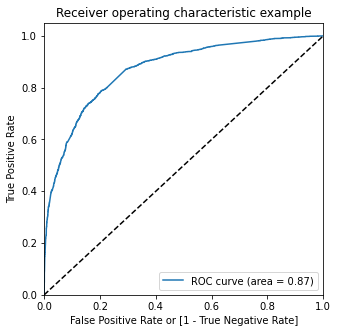

In [76]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [77]:
#The ROC Curve should be a value close to 1. We are getting a good value of    indicating a good predictive model.

In [78]:
#Finding Optimal Cutoff Point
#Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [79]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.673913,7962,1,1,1,1,1,1,1,1,0,0,0
1,0,0.114408,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.178734,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.986353,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.576178,9170,1,1,1,1,1,1,1,0,0,0,0


In [80]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.514752  0.981397  0.229193
0.2   0.2  0.734777  0.902852  0.631925
0.3   0.3  0.790019  0.791236  0.789274
0.4   0.4  0.801946  0.733774  0.843663
0.5   0.5  0.800847  0.665978  0.883380
0.6   0.6  0.790804  0.576271  0.922084
0.7   0.7  0.774482  0.490699  0.948141
0.8   0.8  0.756121  0.400579  0.973691
0.9   0.9  0.715945  0.266226  0.991146


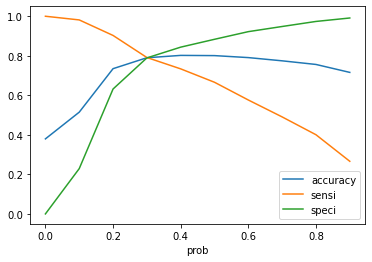

In [81]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [82]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.673913,7962,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.114408,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.178734,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.986353,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.576178,9170,1,1,1,1,1,1,1,0,0,0,0,1


In [83]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.673913,7962,1,67
1,0,0.114408,5520,0,11
2,0,0.178734,1962,0,18
3,1,0.986353,1566,1,99
4,0,0.576178,9170,1,58


In [84]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1914
0     505
Name: final_Predicted, dtype: int64

In [85]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

In [86]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7900188323917138

In [87]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3120,  833],
       [ 505, 1914]], dtype=int64)

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7912360479536998

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.789273969137364

In [91]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.21072603086263597


In [92]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6967601019293775


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8606896551724138


Predictions on the test set

In [94]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Time_Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_NA,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
3504,-0.089406,-0.108519,0.308788,-0.033162,0.0,-0.019139,0.0,0.0,0.0,-0.019139,...,0,0,1,0,0,0,0,0,1,0
4050,-0.788357,-0.888077,-1.133359,-0.033162,0.0,-0.019139,0.0,0.0,0.0,-0.019139,...,0,0,1,0,0,0,0,1,0,0
7201,-0.322390,0.420993,-0.171928,-0.033162,0.0,-0.019139,0.0,0.0,0.0,-0.019139,...,0,0,1,0,0,0,0,0,1,0
1196,0.143578,-0.110357,0.789504,-0.033162,0.0,-0.019139,0.0,0.0,0.0,-0.019139,...,0,0,1,0,0,0,0,0,1,0
8219,0.842530,-0.433947,-0.292107,-0.033162,0.0,-0.019139,0.0,0.0,0.0,-0.019139,...,0,0,1,0,0,0,0,0,1,0


In [95]:
X_test = X_test[col]
X_test.head()

,Time_Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Info_on_XEducation_Email,Current_Occupation_Working Professional,Lead Profile_NA,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
3504,-0.108519,0,0,0,1,0,0,0,0,0,0,0
4050,-0.888077,1,0,0,0,0,0,0,0,0,1,0
7201,0.420993,0,1,0,0,0,0,0,0,0,0,0
1196,-0.110357,0,0,0,1,0,0,0,0,0,0,0
8219,-0.433947,0,1,0,0,0,0,0,0,0,0,0


In [96]:
X_test_sm = sm.add_constant(X_test)

In [97]:
X_test_sm.shape

(2731, 13)

In [98]:
y_test_pred = res.predict(X_test_sm)   

In [99]:
y_test_pred[:10]

3504    0.240750
4050    0.941679
7201    0.323865
1196    0.240381
8219    0.157640
8747    0.104490
9048    0.589989
6524    0.178639
7693    0.132618
8187    0.812937
dtype: float64

In [100]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [101]:
# Let's see the head
y_pred_1.head()

,0
3504,0.240750
4050,0.941679
7201,0.323865
1196,0.240381
8219,0.157640


In [102]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [103]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [104]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [106]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.240750
1,1,4050,0.941679
2,0,7201,0.323865
3,0,1196,0.240381
4,1,8219,0.157640


In [107]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.240750
1,1,4050,0.941679
2,0,7201,0.323865
3,0,1196,0.240381
4,1,8219,0.157640


In [108]:
#Assigning Lead Score
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [109]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.240750,24
1,4050,1,0.941679,94
2,7201,0,0.323865,32
3,1196,0,0.240381,24
4,8219,1,0.157640,16


In [110]:

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [111]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.240750,24,0
1,4050,1,0.941679,94,1
2,7201,0,0.323865,32,1
3,1196,0,0.240381,24,0
4,8219,1,0.157640,16,0


In [112]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    823
0    219
Name: final_Predicted, dtype: int64

In [113]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8011717319663128

In [115]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1365,  324],
       [ 219,  823]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.789827255278311

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.8081705150976909

In [119]:
from sklearn.metrics import precision_score, recall_score

In [120]:
# Precision and Recall metrics for the test set

precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7175239755884917

In [121]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.789827255278311

Conclusion
It was found that the variables that mattered the most in the potential buyers are:

The total time spend on the Website.

When the lead source was:
a. Google
b. Direct traffic
c. Organic search
d. Welingak website
e. Referral Site

When the lead origin was:
a. Lead Add Form
b. Student of Some School

When their current occupation is : working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses